In [588]:
import numpy as np
import pandas as pd


In [589]:
raw_data=pd.read_csv('deliveries.csv')
wk_raw_data=pd.read_csv('IPLWK.csv')

In [590]:
data=raw_data.copy()
wk_data=wk_raw_data.copy()
data.head()
flatten = lambda r: [item for sublist in r for item in sublist]

In [591]:
wk_data.head()

,MatchID,Team,WK,11309
0,0,Sunrisers Hyderabad,NV Ojha,11309.0
1,0,Royal Challengers Bangalore,KM Jadhav,11310.0
2,1,Mumbai Indians,PA Patel,11310.0
3,1,Rising Pune Supergiant,MS Dhoni,11311.0
4,2,Gujarat Lions,KD Karthik,11311.0


In [592]:
IPL_2008=data.loc[(data['match_id']>=60)&(data['match_id']<=117)]
IPL_2009=data.loc[(data['match_id']>=118)&(data['match_id']<=174)]
IPL_2010=data.loc[(data['match_id']>=175)&(data['match_id']<=234)]
IPL_2011=data.loc[(data['match_id']>=235)&(data['match_id']<=307)]
IPL_2012=data.loc[(data['match_id']>=308)&(data['match_id']<=381)]
IPL_2013=data.loc[(data['match_id']>=382)&(data['match_id']<=457)]
IPL_2014=data.loc[(data['match_id']>=458)&(data['match_id']<=517)]
IPL_2015=data.loc[(data['match_id']>=518)&(data['match_id']<=576)]
IPL_2016=data.loc[(data['match_id']>=577)&(data['match_id']<=636)]
IPL_2017=data.loc[(data['match_id']>=0)&(data['match_id']<=59)]
IPL_2018=data.loc[(data['match_id']>=7894)&(data['match_id']<=10000)]
IPL_2019=data.loc[(data['match_id']>=11137)]

In [593]:
years=[2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]

In [594]:
IPL=[IPL_2008,IPL_2009,IPL_2010,IPL_2011,IPL_2012,IPL_2013,IPL_2014,IPL_2015,IPL_2016,IPL_2017,IPL_2018,IPL_2019]

In [595]:
def bowler(str,start,end):
    a=[]
    for i in range(start-1,end):
        b=IPL[i]
        c=b[b['bowler']==str]
        a.append(c)
    return a

In [596]:
def wickets(m,start,end):
    a=[]
    for i in range(start-1,end):
        bowler=m[i]
        wickets=bowler.dropna(subset=['player_dismissed'])
        wickets=wickets[wickets.dismissal_kind!='run out']
        a.append(wickets)
    return a

In [597]:
m=bowler('SL Malinga',1,12)
w=wickets(m,1,12)
len(w)

12

In [598]:
def calc_fib(w):
    total=[]
    fiw=[]
    fib_percent=[]
    for i in range(len(w)):
        a=w[i]
        total.append(a.shape[0])
        b=a[a['fielder'].isnull()]
        fiw.append(b.shape[0])
        if a.shape[0]!=0:
            c=float(100*b.shape[0]/a.shape[0])
            fib_percent.append(round(c,2))
        else:
            fib_percent.append(0)
    return total,fiw ,fib_percent   

In [599]:
total_malinga,fiw_malinga,final_fib_malinga=calc_fib(w)

In [600]:
final_fib_malinga

[0, 61.11, 53.33, 64.29, 50.0, 65.0, 37.5, 29.17, 0, 36.36, 0, 6.25]

In [601]:
class CALC_FIB:
    def __init__(self,bowler):
        self.bowler=bowler
    
    def bowler_complete(self):
        a=[]
        for i in range(12):
            b=IPL[i]
            c=b[b['bowler']==self.bowler]
            a.append(c)
        return a

    def wickets(self):
        a=[]
        m=self.bowler_complete()
        for i in range(12):
            b=m[i]
            wickets=b.dropna(subset=['player_dismissed'])
            wickets=wickets[wickets.dismissal_kind!='run out']
            a.append(wickets)
        return a
    
    def wkincl(self):
        all_wickets=self.wickets()
        wk_wickets=[]
        a=[]
        for i in range(len(all_wickets)):
            wk_pairs=[]
            b=all_wickets[i]
            for j in range(len(b)):
                m1=all_wickets[i].iloc[j,0]
                m2=wk_data[wk_data['MatchID']==m1]
                wk=list(m2['WK'])
                wk_pairs.append(wk)
            wk_season=set(flatten(wk_pairs))
            q=b[(b['fielder'].isin(wk_season))]
            wk_wickets.append(q)
        for i in range(len(wk_wickets)):
            a.append(len(wk_wickets[i]))
        return a
    
    def fib_calculator(self):
        w=self.wickets()
        wk=self.wkincl()
        total=[]
        fiw=[]
        fib_percent=[]
        for i in range(len(w)):
            a=w[i]
            total.append(a.shape[0])
            b=a[a['fielder'].isnull()]
            e=b.shape[0]+wk[i]
            fiw.append(e)
            if a.shape[0]!=0:
                c=float(100*e/a.shape[0])
                fib_percent.append(round(c,2))
            else:
                fib_percent.append(0)
        return total,fiw,fib_percent 
    
    def strike_rate(self):
        b=self.bowler_complete()
        w=self.wickets()
        tb=0
        total_balls_season=[]
        tw=0
        for i in range(len(w)):
            total_balls_season.append(len(b[i]))
            tw=tw+len(w[i])
            tb=tb+len(b[i])
        if tw!=0:
            sr=tb/tw
            strike_rate_final=round(sr,2)
            return strike_rate_final

In [602]:
r=CALC_FIB('SL Malinga').fib_calculator()
q=CALC_FIB('SL Malinga').wkincl()
r

([0, 18, 15, 28, 22, 20, 16, 24, 0, 11, 0, 16],
 [0, 12, 9, 20, 12, 13, 7, 11, 0, 4, 0, 6],
 [0, 66.67, 60.0, 71.43, 54.55, 65.0, 43.75, 45.83, 0, 36.36, 0, 37.5])

In [603]:
r[2]

[0, 66.67, 60.0, 71.43, 54.55, 65.0, 43.75, 45.83, 0, 36.36, 0, 37.5]

In [604]:
bowlers=data['bowler']

In [605]:
q=set(bowlers)

In [606]:
k=list(q)

In [607]:
len(k)
k[1]

'CR Woakes'

In [608]:
bowler_name=[]
total_wickets_season=[]
fielding_ind_wickets_season=[]
fielding_ind_percent=[]
sum_total_wickets=[]
sum_fiw=[]
average_fip=[]
strike_r=[]
for i in range(len(k)):
    r=CALC_FIB(k[i]).fib_calculator()
    u=CALC_FIB(k[i]).strike_rate()
    if sum(r[0])!=0:
        bowler_name.append(k[i])
        total_wickets_season.append(r[0])
        fielding_ind_wickets_season.append(r[1])
        fielding_ind_percent.append(r[2])
        sum_total_wickets.append(sum(r[0]))
        sum_fiw.append(sum(r[1]))
        average_fip.append(100*round(sum(r[1])/sum(r[0]),2))
        strike_r.append(u)
    

In [628]:
len(bowler_name)
np.mean(average_fip)

36.9367816091954

In [610]:
final_fiwp_bowlers=pd.DataFrame({'Bowler':bowler_name,'Total Wickets':sum_total_wickets,
                                 'FIW':sum_fiw,'Average FIWP':average_fip,'Strike Rate':strike_r})

In [611]:
final_fiwp_bowlers.head()

,Bowler,Total Wickets,FIW,Average FIWP,Strike Rate
0,CR Woakes,25,6,24.0,15.84
1,B Kumar,133,61,46.0,20.35
2,JJ Bumrah,82,38,46.0,21.93
3,DNT Zoysa,2,1,50.0,34.50
4,YA Abdulla,15,6,40.0,14.80


In [612]:
final_fiwp=final_fiwp_bowlers.sort_values(by='Total Wickets',ascending=False)

In [613]:
top_50=final_fiwp.iloc[:51,:]

In [614]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [615]:
top_50

,Bowler,Total Wickets,FIW,Average FIWP,Strike Rate
142,SL Malinga,170,94,55.0,17.49
309,A Mishra,156,79,51.0,20.33
191,Harbhajan Singh,150,75,50.0,23.01
16,PP Chawla,149,85,57.0,21.19
123,DJ Bravo,147,57,39.0,18.44
1,B Kumar,133,61,46.0,20.35
186,R Ashwin,125,53,42.0,24.13
338,SP Narine,122,75,61.0,21.31
163,UT Yadav,119,47,39.0,21.89
251,RA Jadeja,108,58,54.0,23.53


In [616]:
#sns.pairplot(top_50)

In [617]:
def yearly_fiwp(b_name):
    years_func=[2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
    b=bowler_name.index(b_name)
    t=total_wickets_season[b]
    f=fielding_ind_percent[b]
    y=years_func
    present=[]
    fiwp=[]
    wickets=[]
    played=[]
    for i in range(len(t)):
        if t[i]!=0:
            present.append(i)
    for i in range(len(present)):
        played.append(y[present[i]])
        wickets.append(t[present[i]])
        fiwp.append(f[present[i]])
    return present,played,wickets,fiwp

In [618]:
%matplotlib inline

In [619]:
yearly_fiwp('SL Malinga')

([1, 2, 3, 4, 5, 6, 7, 9, 11],
 [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2017, 2019],
 [18, 15, 28, 22, 20, 16, 24, 11, 16],
 [66.67, 60.0, 71.43, 54.55, 65.0, 43.75, 45.83, 36.36, 37.5])

In [620]:
yearly_fiwp('Rashid Khan')

([9, 10, 11], [2017, 2018, 2019], [17, 21, 17], [70.59, 61.9, 52.94])

In [621]:
yearly_fiwp('MJ McClenaghan')

([7, 8, 9, 10, 11],
 [2015, 2016, 2017, 2018, 2019],
 [18, 17, 19, 14, 3],
 [11.11, 47.06, 42.11, 14.29, 66.67])

In [622]:
yearly_fiwp('DJ Bravo')

([0, 1, 2, 3, 4, 5, 7, 8, 10, 11],
 [2008, 2009, 2010, 2011, 2012, 2013, 2015, 2016, 2018, 2019],
 [11, 11, 4, 6, 15, 32, 26, 17, 14, 11],
 [63.64, 36.36, 50.0, 16.67, 53.33, 46.88, 23.08, 64.71, 14.29, 9.09])

In [634]:
def plot_fiwp(b_name):
    b=yearly_fiwp(b_name)
    wickets=b[2]
    marker=[]
    for i in range(len(wickets)):
        marker.append(wickets[i]**2)
    fiwp=b[3]
    y=b[1]
    mean=np.mean(fiwp)
    league_mean=37
    league_mean_list=[]
    mean_list=[]
    for i in range(len(wickets)):
        mean_list.append(mean)
        league_mean_list.append(league_mean)
    plt.figure(figsize=(8,4))
    ax = plt.axes()
    plt.ylim(-10,100)
    # Setting the background color
    ax.set_facecolor("khaki")
    ax.tick_params(axis='both', which='major', labelsize=16)
    #plt.scatter(y,t,label='WICKETS')
    plt.scatter(y,fiwp,label='FIWP',s=marker,color='maroon')
    #plt.plot(y,t)
    plt.plot(y,fiwp,color='maroon')
    plt.plot(y,mean_list,color='maroon',linestyle='--',linewidth=5,label='Bowler Mean')
    plt.plot(y,league_mean_list,color='black',linestyle='--',linewidth=3,label='League Mean')
    plt.title(b_name,fontsize=20)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',prop={'size': 14}, borderaxespad=0.)
    plt.show()

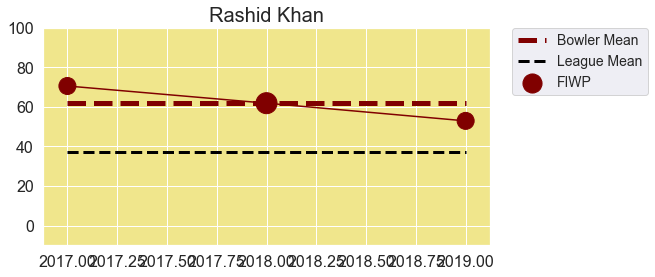

In [636]:
plot_fiwp('Rashid Khan')

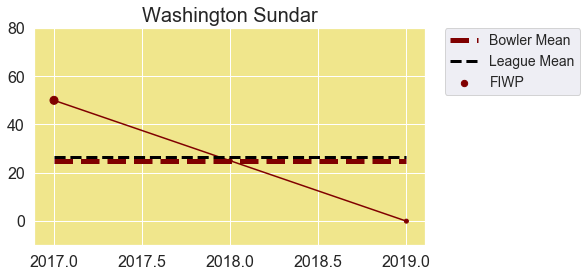

In [625]:
plot_fiwp('Washington Sundar')